<a href="https://colab.research.google.com/github/fwilhelmy/IFT6135-2025/blob/main/HW1_2025/assignment1_release/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

In [2]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


MessageError: Error: credential propagation was unsuccessful

In [6]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/IFT6135/HW1_2025/assignment1_release" #@param {type:"string"}
!ln -Ts "$folder" /content/assignment 2> /dev/null

# Add the assignment folder to Python path
if '/content/assignment' not in sys.path:
  sys.path.insert(0, '/content/assignment')

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

### Running on GPU
For this assignment, it will be necessary to run your experiments on GPU. To make sure the notebook is running on GPU, you can change the notebook settings with
* (EN) `Edit > Notebook Settings`
* (FR) `Modifier > Paramètres du notebook`


In [1]:
%matplotlib inline
import warnings

from main import Arguments, run_experiment
from utils import save_model, load_model

# Local Test
Before run the experiment, here are some local test cases you can run for sanity check

In [2]:
import unittest
import testy
suite = unittest.TestLoader().loadTestsFromModule(testy)
unittest.TextTestRunner(verbosity=2).run(suite)

test_linear_attributes (testy.TestLinear.test_linear_attributes) ... ok
test_linear_forward (testy.TestLinear.test_linear_forward) ... ok
test_activation (testy.TestMLP.test_activation) ... ok
test_forward (testy.TestMLP.test_forward) ... ok
test_mlp (testy.TestMLP.test_mlp) ... ok
test_mixer_block (testy.TestMLPMixer.test_mixer_block) ... ok
test_mlpmixer (testy.TestMLPMixer.test_mlpmixer) ... ok
test_patch_emb (testy.TestMLPMixer.test_patch_emb) ... ok
test_basic_block (testy.TestResNet.test_basic_block) ... ok
test_basic_block2 (testy.TestResNet.test_basic_block2) ... ok
test_resnet (testy.TestResNet.test_resnet) ... ok
test_ce_loss (testy.TestUtils.test_ce_loss) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.996s

OK


<unittest.runner.TextTestResult run=12 errors=0 failures=0>

# Experiments

## Experiment 1

For the MLP architecture, investigate the effect of the choice of non-linearity while keeping the other hyperparameters the same as the default. You are expected to provide four figures corresponding to training loss, validation loss, training accuracy, and validation accuracy, where the x-axis is the number of epochs. For each figure, use the legend to denote the non-linearity being used. Conclude which non-linearity is the best and give your explanation. Optionally, we provide the plotting utility function in utils.py

c:\Users\fwilh\Desktop\IFT6135-2025\HW1_2025\assignment1_release\main.py:104: UserWarning: CUDA is not available, make that your environment is running on GPU (e.g. in the Notebook Settings in Google Colab). Forcing device="cpu".
  warnings.warn(
c:\Users\fwilh\Desktop\IFT6135-2025\HW1_2025\assignment1_release\main.py:112: UserWarning: You are about to run on CPU, and might run out of memory shortly. You can try setting batch_size=1 to reduce memory usage.
  warnings.warn(


Build model MLP...
Loading model config from model_configs/mlp/mlp_relu.json
########## MLP CONFIG ################
input_size:	3072
hidden_sizes:	[1024, 512, 64, 64]
num_classes:	10
activation:	relu
############################################
Initialized MLP model with 3709194 total parameters, of which 3709194 are learnable.
====== Epoch 0 ======>
[TRAIN] Epoch: 0, Iter: 0, Loss: 2.45333
[TRAIN] Epoch: 0, Iter: 80, Loss: 1.84040
[TRAIN] Epoch: 0, Iter: 160, Loss: 1.79643
[TRAIN] Epoch: 0, Iter: 240, Loss: 1.54359
[TRAIN] Epoch: 0, Iter: 320, Loss: 1.66979
== [TRAIN] Epoch: 0, Accuracy: 0.365 ==>
[VAL] Epoch: 0, Iter: 0, Loss: 1.70092
=== [VAL] Epoch: 0, Iter: 39, Accuracy: 0.424 ===>
[TEST] Epoch: 0, Iter: 0, Loss: 1.61334
=== [TEST] Epoch: 0, Iter: 78, Accuracy: 0.420 ===>
===== Best validation Accuracy: 0.424 =====>
Writing training logs to results/experiment1/mlp_relu...
Model saved to results/experiment1/mlp_relu\model.pth
Build model MLP...
Loading model config from model_confi

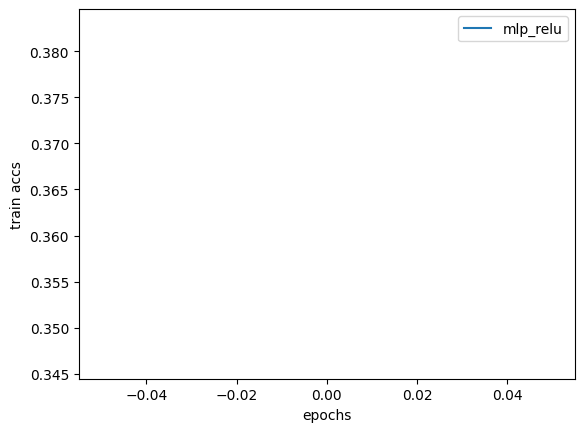

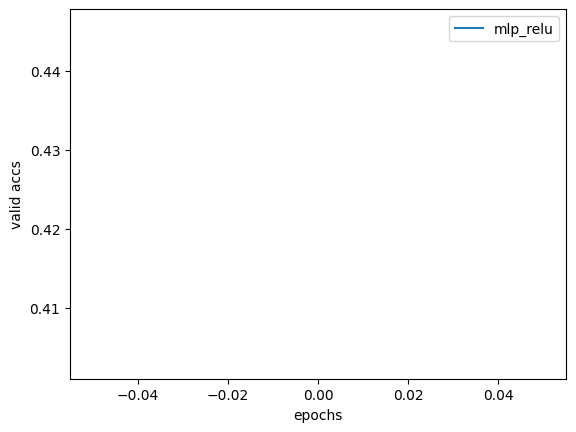

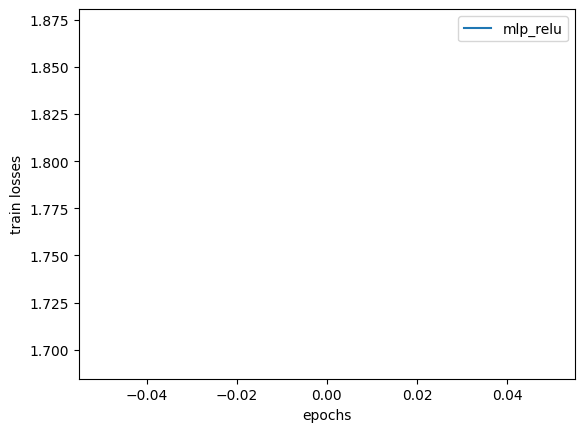

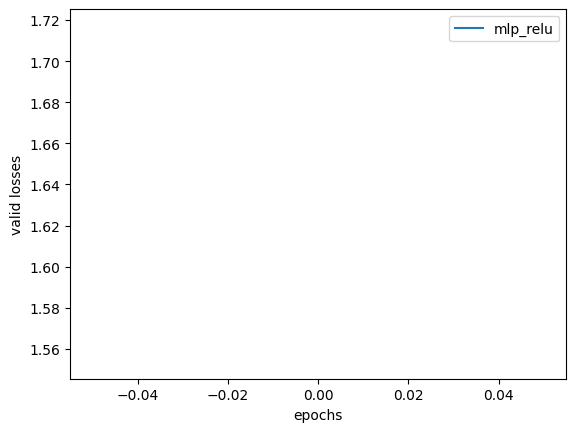

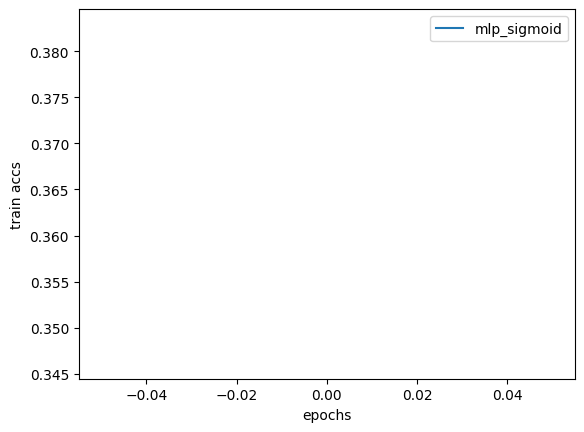

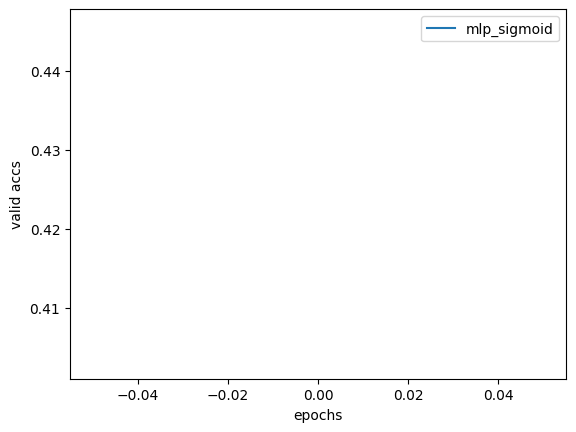

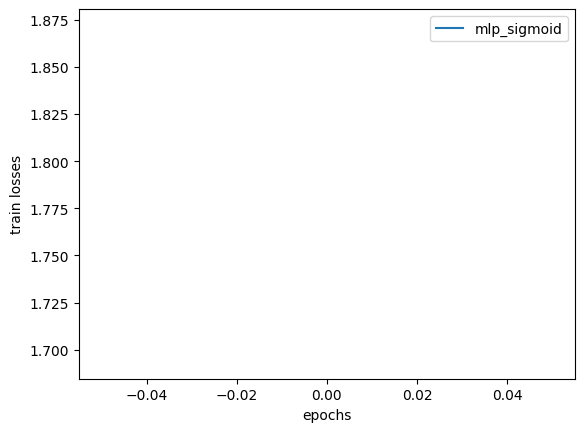

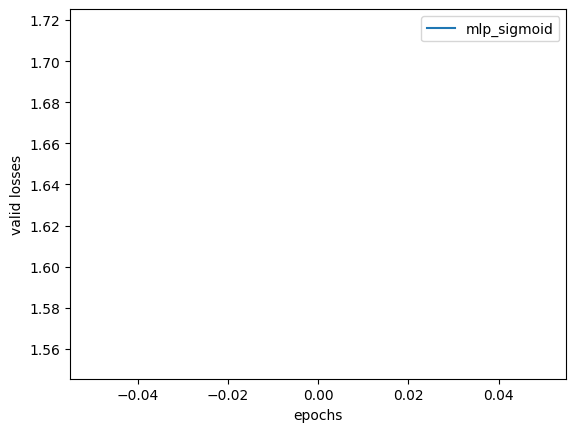

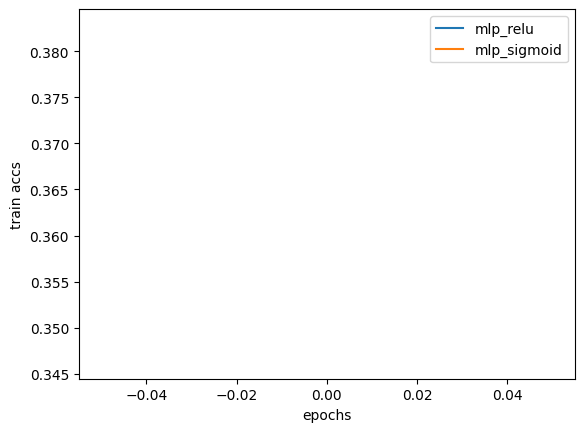

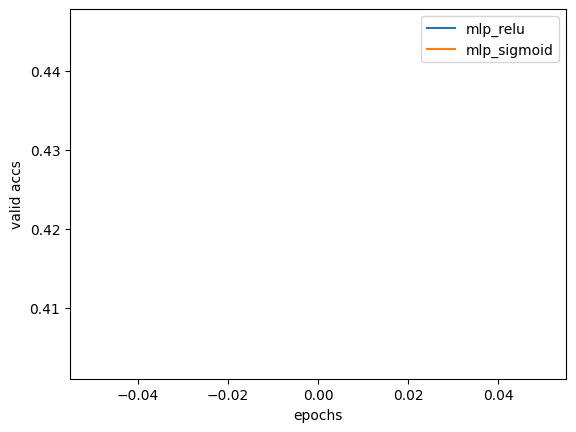

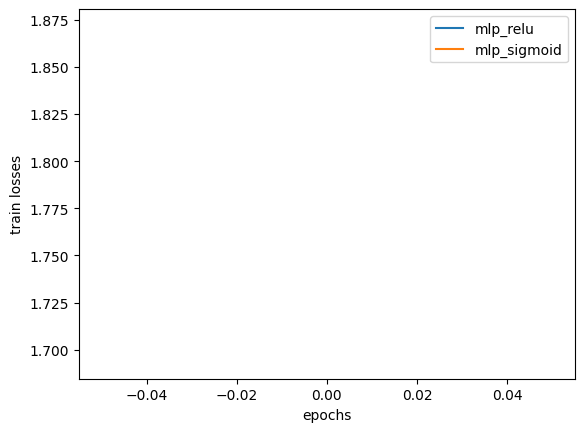

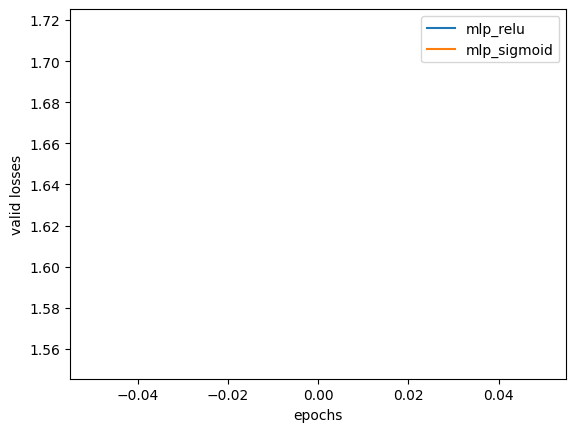

In [ ]:
experiment1 = {
    "mlp_relu": Arguments(logdir="results/experiment1/mlp_relu", model='mlp', model_config='model_configs/mlp/mlp_relu.json', epochs=10),
    "mlp_sigmoid": Arguments(logdir="results/experiment1/mlp_sigmoid", model='mlp', model_config='model_configs/mlp/mlp_sigmoid.json', epochs=10),
    "mlp_tanh": Arguments(logdir="results/experiment1/mlp_tanh", model='mlp', model_config='model_configs/mlp/mlp_tanh.json', epochs=10),
}

run_experiment("experiment1", experiment1)

In [ ]:
!zip -r experiment1.zip results/experiment1

## Experiment 2 

For the ResNet18 architecture, investigate the effect of learning rate with the Adam optimizer. Perform experiments with learning rates of 0.1, 0.01, 0.001, 0.0001, 0.00001. Provide the figures and explain your findings.

In [ ]:
experiment2 = {
    "resnet18_lr_1e-1": Arguments(logdir="results/experiment2/resnet18_lr_1e-1", model='resnet18', model_config='assignment/model_configs/resnet18.json', optimizer='adam', epochs=10, lr=1e-1),
    "resnet18_lr_1e-2": Arguments(logdir="results/experiment2/resnet18_lr_1e-2", model='resnet18', model_config='assignment/model_configs/resnet18.json', optimizer='adam', epochs=10, lr=1e-2),
    "resnet18_lr_1e-3": Arguments(logdir="results/experiment2/resnet18_lr_1e-3", model='resnet18', model_config='assignment/model_configs/resnet18.json', optimizer='adam', epochs=10, lr=1e-3),
    "resnet18_lr_1e-4": Arguments(logdir="results/experiment2/resnet18_lr_1e-4", model='resnet18', model_config='assignment/model_configs/resnet18.json', optimizer='adam', epochs=10, lr=1e-4),
    "resnet18_lr_1e-5": Arguments(logdir="results/experiment2/resnet18_lr_1e-5", model='resnet18', model_config='assignment/model_configs/resnet18.json', optimizer='adam', epochs=10, lr=1e-5),
}

run_experiment("experiment2", experiment2)

In [ ]:
!zip -r experiment2.zip results/experiment2

## Experiment 3

For MLPMixer, investigate the effect of patch size. No recommended values are given, and you are expected to run at least 3 experiments. Remember there are only a few valid values for patch size for the given image size. Please provide figures and explain your findings. Also explain in text the effect on the number of model parameters and running time.

C:\Users\fwilh\AppData\Local\Temp\ipykernel_29408\4235923879.py:6: UserWarning: CUDA is not available, make that your environment is running on GPU (e.g. in the Notebook Settings in Google Colab). Forcing device="cpu".
  warnings.warn(
C:\Users\fwilh\AppData\Local\Temp\ipykernel_29408\4235923879.py:14: UserWarning: You are about to run on CPU, and might run out of memory shortly. You can try setting batch_size=1 to reduce memory usage.
  warnings.warn(


Build model MLPMIXER...
Loading model config from model_configs/mlpmixer/mlpmixer_patch2.json
########## MLPMIXER CONFIG ################
num_classes:	10
img_size:	32
patch_size:	2
embed_dim:	256
num_blocks:	4
drop_rate:	0.0
activation:	gelu
############################################
Initialized MLPMIXER model with 2376458 total parameters, of which 2376458 are learnable.
====== Epoch 0 ======>
[TRAIN] Epoch: 0, Iter: 0, Loss: 2.44971
[TRAIN] Epoch: 0, Iter: 80, Loss: 1.72474
[TRAIN] Epoch: 0, Iter: 160, Loss: 1.46766
[TRAIN] Epoch: 0, Iter: 240, Loss: 1.40507
[TRAIN] Epoch: 0, Iter: 320, Loss: 1.43083
== [TRAIN] Epoch: 0, Accuracy: 0.419 ==>
[VAL] Epoch: 0, Iter: 0, Loss: 1.38753
=== [VAL] Epoch: 0, Iter: 39, Accuracy: 0.502 ===>
====== Epoch 1 ======>
[TRAIN] Epoch: 1, Iter: 0, Loss: 1.17286
[TRAIN] Epoch: 1, Iter: 80, Loss: 1.29201
[TRAIN] Epoch: 1, Iter: 160, Loss: 1.39390
[TRAIN] Epoch: 1, Iter: 240, Loss: 1.10111
[TRAIN] Epoch: 1, Iter: 320, Loss: 1.42790
== [TRAIN] Epoch: 1, A

FileNotFoundError: [Errno 2] No such file or directory: 'results/experiment3_mlpmixer_patch_size\\train_accs.png'

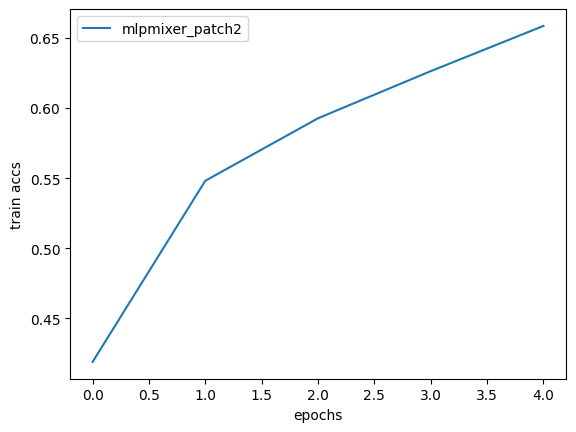

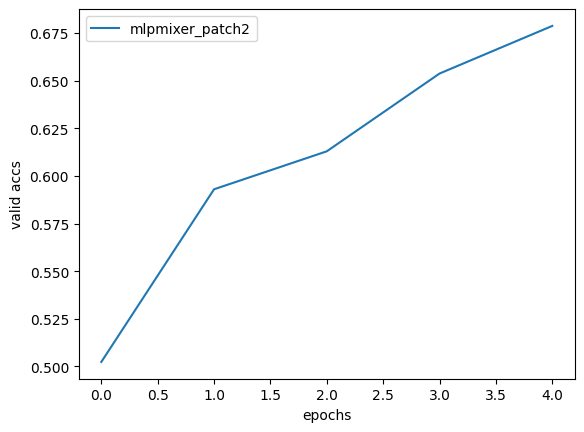

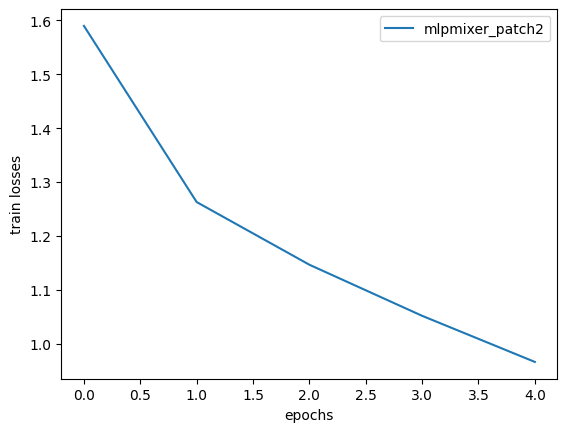

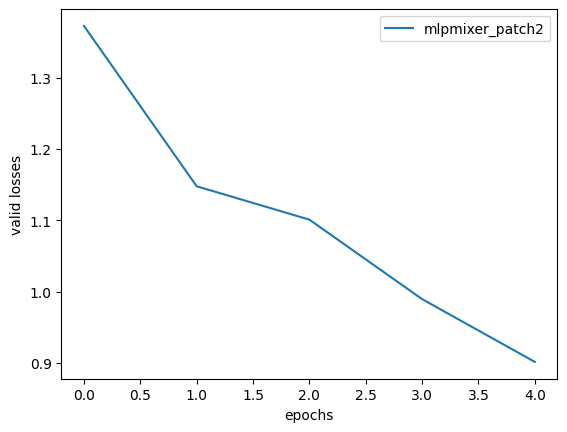

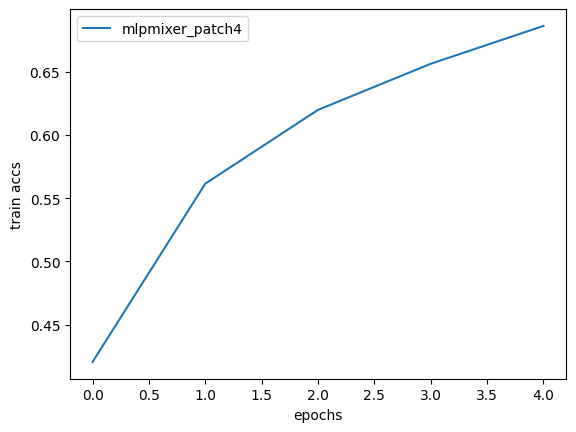

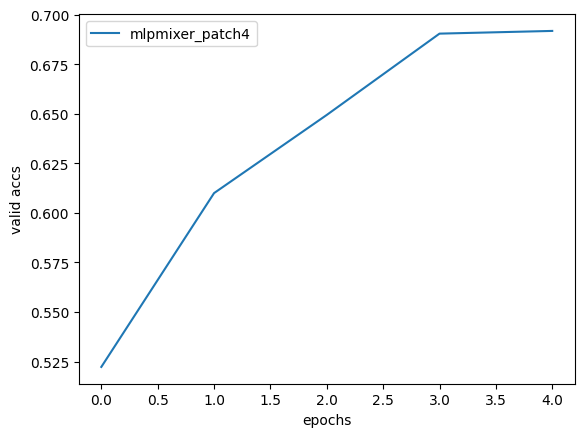

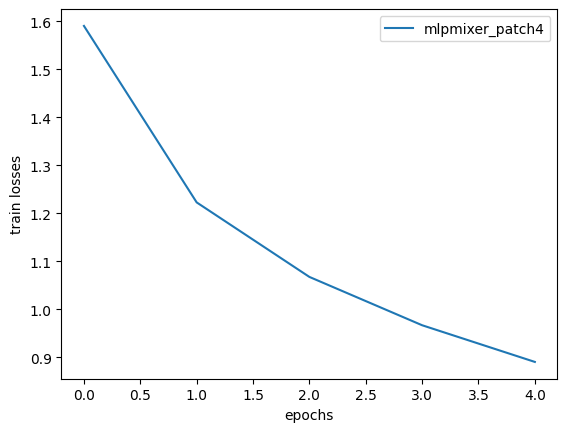

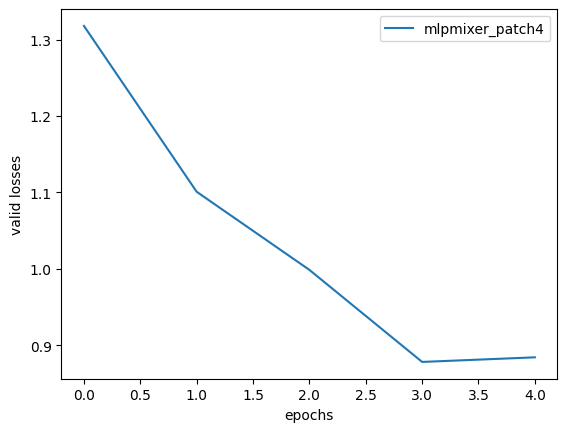

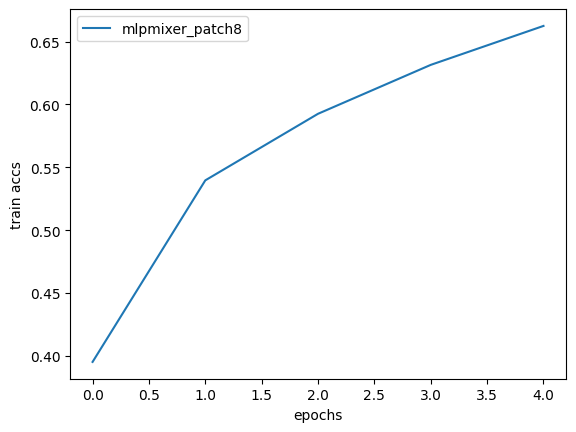

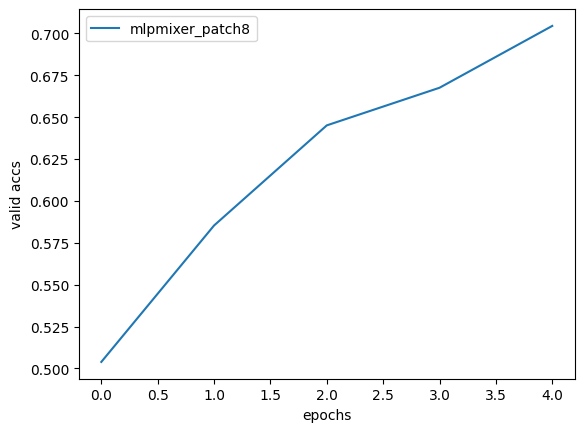

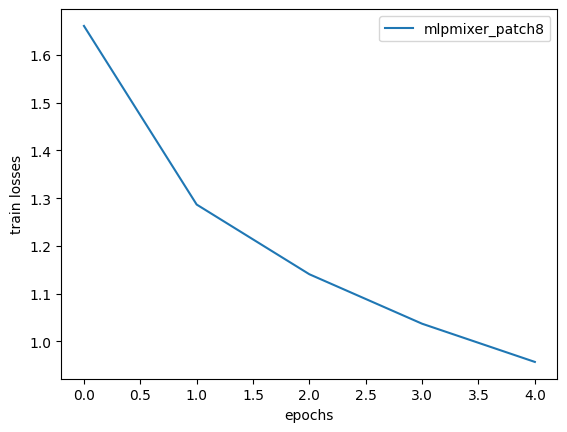

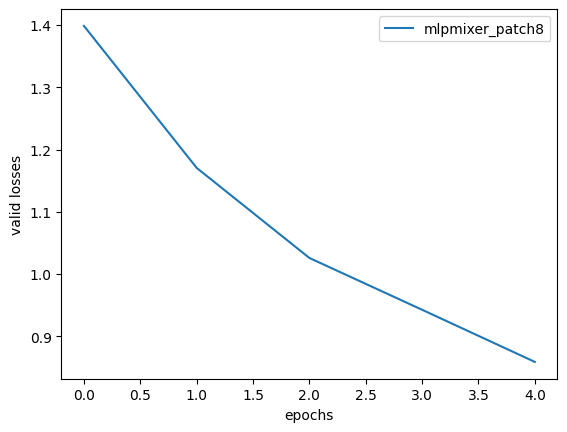

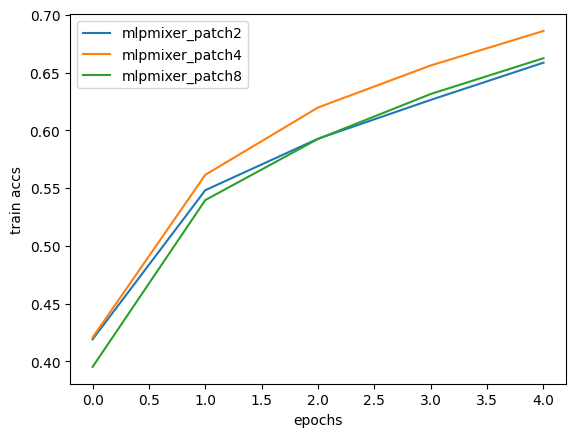

In [ ]:
experiment3 = {
    "mlpmixer_patch2": Arguments(logdir="results/experiment3/mlpmixer_patch2", model='mlpmixer', model_config='model_configs/mlpmixer/mlpmixer_patch2.json', epochs=5),
    "mlpmixer_patch4": Arguments(logdir="results/experiment3/mlpmixer_patch4", model='mlpmixer', model_config='model_configs/mlpmixer/mlpmixer_patch4.json', epochs=5),
    "mlpmixer_patch8": Arguments(logdir="results/experiment3/mlpmixer_patch8", model='mlpmixer', model_config='model_configs/mlpmixer/mlpmixer_patch8.json', epochs=5)
}

run_experiment("experiment3", experiment3)


In [ ]:
!zip -r experiment3.zip results/experiment3

## Experiment 4

Find your best ResNet18 model by experimenting with different hyper-parameter choices. Provide the hyperparameters in your report. Visualize the kernels of the first layer, which has a weight of shape (out channel, in channel, kernel size, kernel size). You can modify the main.py or add extra cell in main.ipynb for visualization. Since we have 64 output channels and 3 input channels (RGB), one can view this as sixty-four 3 × 3 small images, where each image represent the kernel corresponding to that output channel. Note that this is an open-ended question. You can perform different pre-processing for visualization, e.g., standardizing the weight values, averaging across the channels to have gray scale images etc. You can see more details and examples in this blogpost. Please describe your visualization procedure in your report.

### Hyperparameters choice: 
- Batch Size (??)
- Optimizer [X] (adamw, adam, sgd, momentum)
- Epochs (10, 20, 30)
- Learning Rate [X] (??)
- Momentum (??)
- Weight Decay [X] (??)

### Configuration
- The two Adam experiments use a moderate learning rate of 1e-3 with two weight decay settings to test regularization strength.
- The SGD experiments use a higher learning rate (1e-2) as is common when momentum is used.

In [ ]:
optimizers = ["adamw", "adam", "sgd"]
lrs = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
experiment4 = {}
for optimizer in optimizers:
    for lr in lrs:
        name = f"{optimizer}_lr_{lr}"
        experiment4[name] = Arguments(logdir=f"results/experiment4/{name}", model='resnet18', model_config='assignment/model_configs/resnet18.json', optimizer=optimizer, epochs=10, lr=lr)

run_experiment("experiment4", experiment4)

In [ ]:
!zip -r experiment4.zip results/experiment4

## Experiment 5

Set the patch size to be 4, and find hyper-parameters for your best MLPMixer model. Provide the full hyper-parameters in your report. Visualize the weights (only first layer) of token-mixing MLP in the first block as is described in Figure 5 of the MLPMixer paper. Comment and compare your results with the convolution visualizations. Explain what you think is the reason behind the success of the MLPMixer, especially over normal MLP?

### Why These Hyperparameters?
- **Patch Size = 4** [Using a smaller patch size (4 instead of, say, 8) increases the number of tokens (for a 32×32 image, 8×8 = 64 tokens), giving finer spatial resolution.]
- **Embedding Dimension** [We choose 512 to have enough capacity to encode richer information from more patches.]
- **Drop Rate and Number of Blocks** [A moderate dropout (e.g. 0.1) and 8 MixerBlocks are common in literature for MLPMixer variants on CIFAR-like datasets.]
- These choices help balance capacity and regularization.
- The experiment uses the Adam optimizer with a moderate learning rate of 1e-3. This setting is commonly effective for MLP-based architectures.

In [ ]:
# TODO

In [ ]:
!zip -r experiment5.zip results/experiment5

## Experiment 6

Investigate how the width of the token-mixing and channel-mixing MLP layers affects the model’s generalization ability. Train the MLP-Mixer model with varying widths for the token-mixing and channel-mixing MLP layers (e.g., 256, 512, 1024). Compare the training and validation accuracies across different widths. Analyze how the capacity of the MLP layers impacts overfitting or underfitting.

In [ ]:
# TODO

In [ ]:
!zip -r experiment6.zip results/experiment6

## Experiment 7

Compare the gradient flow (e.g., norms of gradients at different layers) during backpropagation for all three architectures (MLP, ResNet18 and MLPMixer). Analyze and compare the behavior of gradients in each architecture.

In [ ]:
# TODO

In [ ]:
!zip -r experiment7.zip results/experiment7